In [26]:
from keras.datasets import imdb
top_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=top_words)

The reason the inner lists contain numbers rather than text is that you don't train a neural network with text; you train it with numbers. Specifically, you train it with tensors. In this case, each review is a 1-dimensional tensor (think of a 1-dimensional array) containing integers identifying the words contained in the review. To demonstrate, type the following Python statement into an empty cell and execute it to see the integers representing the first review in the training set:

In [27]:
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

Integers comprising the first review in the IMDB training set

The first number in the list — 1 — doesn't represent a word at all. It marks the start of the review and is the same for every review in the dataset. The numbers 0 and 2 are reserved as well, and you subtract 3 from the other numbers to map an integer in a review to the corresponding integer in the dictionary. The second number — 14 — references the word that corresponds to the number 11 in the dictionary, the third number represents the word assigned the number 19 in the dictionary, and so on.

In [28]:
imdb.get_word_index()

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

As you have seen, each review in the dataset is encoded as a collection of integers rather than words. Is it possible to reverse-encode a review so you can see the original text that comprised it? Enter the following statements into a new cell and execute them to show the first review in x_train in textual format:

In [29]:
word_dict = imdb.get_word_index()
word_dict = { key:(value + 3) for key, value in word_dict.items() }
word_dict[''] = 0  # Padding
word_dict['>'] = 1 # Start
word_dict['?'] = 2 # Unknown word
reverse_word_dict = { value:key for key, value in word_dict.items() }
print(' '.join(reverse_word_dict[id] for id in x_train[0]))

> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

The reviews are "clean" in the sense that letters have been converted to lowercase and punctuation characters removed. But they are not ready to train a neural network to analyze text for sentiment. When you train a neural network with collection of tensors, each tensor needs to be the same length. At present, the lists representing reviews in x_train and x_test have varying lengths.

Fortunately, Keras includes a function that takes a list of lists as input and converts the inner lists to a specified length by truncating them if necessary or padding them with 0s. Enter the following code into the notebook and run it to force all the lists representing movie reviews in x_train and x_test to a length of 500 integers:

In [30]:
from keras.preprocessing import sequence
max_review_length = 500
x_train = sequence.pad_sequences(x_train, maxlen=max_review_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_review_length)

Now that the training and testing data is prepared, it is time to build the model! Run the following code in the notebook to create a neural network that performs sentiment analysis:

NOTE: In a neural network, the activation function is responsible for transforming the summed weighted input from the node into the activation of the node or output for that input.

In [31]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.embeddings import Embedding
from keras.layers import Flatten

embedding_vector_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
flatten_2 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                256016    
_________________________________________________________________
dense_5 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 576,305
Trainable params: 576,305
Non-trainable params: 0
_________________________________________________________________
None


This code is the essence of how you construct a neural network with Keras. It first instantiates a Sequential object representing a "sequential" model — one that is composed of an end-to-end stack of layers in which the output from one layer provides input to the next.

The next several statements add layers to the model. First is an embedding layer, which is crucial to neural networks that process words. The embedding layer essentially maps many-dimensional arrays containing integer word indexes into floating-point arrays containing fewer dimensions. It also allows words with similar meanings to be treated alike. A full treatment of word embeddings is beyond the scope of this lab, but you can learn more by reading Why You Need to Start Using Embedding Layers. If you prefer a more scholarly explanation, refer to Efficient Estimation of Word Representations in Vector Space. The call to Flatten following the addition of the embedding layer reshapes the output for input to the next layer.

The next three layers added to the model are dense layers, also known as fully connected layers. These are the traditional layers that are common in neural networks. Each layer contains n nodes or neurons, and each neuron receives input from every neuron in the previous layer, hence the term "fully connected." It is these layers that permit a neural network to "learn" from input data by iteratively guessing at the output, checking the results, and fine-tuning the connections to produce better results. The first two dense layers in this network contain 16 neurons each. This number was arbitrarily chosen; you might be able to improve the accuracy of the model by experimenting with different sizes. The final dense layer contains just one neuron because the ultimate goal of the network is to predict one output — namely, a sentiment score from 0.0 to 1.0.

The call to the compile function "compiles" the model by specifying important parameters such as which optimizer to use and what metrics to use to judge the accuracy of the model in each training step. Training doesn't begin until you call the model's fit function, so the compile call typically executes quickly.

#  Now call the fit function to train the neural network:

In [32]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3, batch_size=128)

Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 10s 393us/step - loss: 0.5579 - acc: 0.6690 - val_loss: 0.3252 - val_acc: 0.8578
Epoch 2/3
25000/25000 [==============================] - 9s 375us/step - loss: 0.2050 - acc: 0.9212 - val_loss: 0.2852 - val_acc: 0.8806
Epoch 3/3
25000/25000 [==============================] - 9s 365us/step - loss: 0.0682 - acc: 0.9819 - val_loss: 0.3500 - val_acc: 0.8727


This model is unusual in that it learns well with just a few epochs. The training accuracy quickly zooms to near 100%, while the validation accuracy goes up for an epoch or two and then flattens out. You generally don't want to train a model for any longer than is required for these accuracies to stabilize. The risk is overfitting, which results in the model performing well against test data but not so well with real-world data. One indication that a model is overfitting is a growing discrepancy between the training accuracy and the validation accuracy. For a great introduction to overfitting, see Overfitting in Machine Learning: What It Is and How to Prevent It.

To visualize the changes in training and validation accuracy as training progress, execute the following statements in a new notebook cell:

[]

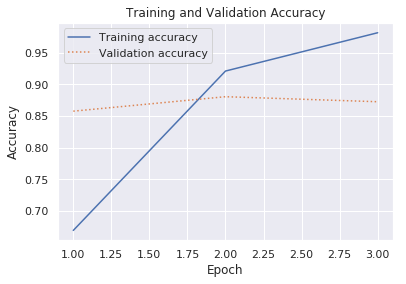

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()
acc = hist.history['acc']
val = hist.history['val_acc']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.plot()

Finish up by calling the model's evaluate method to determine how accurately the model is able to quantify the sentiment expressed in text based on the test data in x_test (reviews) and y_test (0s and 1s, or "labels," indicating which reviews are positive and which are negative):

In [34]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))

Accuracy: 87.27%


We probably achieved an accuracy in the 85% to 90% range. That's acceptable considering we built the model from scratch (as opposed to using a pretrained neural network) and the training time was short even without a GPU. It is possible to achieve accuracies of 95% or higher with alternate neural network architectures, particularly recurrent neural networks (RNNs) that utilize Long Short-Term Memory (LSTM) layers. Keras makes it easy to build such networks, but training time can increase exponentially. The model that we built strikes a reasonable balance between accuracy and training time. However, if you would like to learn more about building RNNs with Keras, see Understanding LSTM and its Quick Implementation in Keras for Sentiment Analysis.

# Use the Neural Network to Analyze Text for Sentiment

The real test comes when we input text of your own into the model and see how it performs — that is, how adapt it is at quantifying the sentiment expressed in that text. In this unit, we'll write a Python function that accepts a text string as input, passes it to the model, and returns a sentiment score. Then you'll use the function to analyze the sentiment expressed in various text strings.

In [36]:
import string
import numpy as np

def analyze(text):
    # Prepare the input by removing punctuation characters, converting
    # characters to lower case, and removing words containing numbers
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    text = text.lower().split(' ')
    text = [word for word in text if word.isalpha()]

    # Generate an input tensor
    input = [1]
    for word in text:
        if word in word_dict and word_dict[word] < top_words:
            input.append(word_dict[word])
        else:
            input.append(2)
    padded_input = sequence.pad_sequences([input], maxlen=max_review_length)

    # Invoke the model and return the result
    result = model.predict(np.array([padded_input][0]))[0][0]
    return result

These statements define a function named analyze that accepts a string as input and returns a number from 0.0 to 1.0 quantifying the sentiment expressed in that string. The higher the number, the more positive the sentiment. The function cleans the input string, converts it into a list of integers referencing words in the dictionary created by the load_data function, and finally calls the model's predict function to score the text for sentiment. 

In [38]:
analyze('Easily the most stellar experience I have ever had.')

0.95449024

In [40]:
analyze('The long lines and poor customer service really turned me off.')

0.10032183

In [41]:
analyze('Their service was extremely excellent.')

0.9169482

Finish up by testing the model with input strings of your own. The results won't be perfect, but you should find that the model is reasonably adept at quantifying sentiment. Even though the model was trained with movie reviews, it isn't limited to analyzing movie reviews. That makes sense because there are inherent similarities between language expressing the like or dislike of a movie and words expressing feelings about other unrelated subjects.